<a href="https://colab.research.google.com/github/milicasopalovic/RI_rokovi/blob/main/najbolji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://gitlab.com/milicasopalovic/ip2-projekat.git

Cloning into 'ip2-projekat'...
remote: Enumerating objects: 3600, done.
remote: Counting objects: 100% (231/231), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 3600 (delta 15), reused 106 (delta 7), pack-reused 3369 (from 1)
Receiving objects: 100% (3600/3600), 78.39 MiB | 35.34 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [4]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import load_img, img_to_array, save_img, image_dataset_from_directory
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from collections import Counter
import cv2
import imghdr
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [5]:
podaci_dir = './ip2-projekat/materijali'

In [6]:
ekstenzije_slika = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for klasa in os.listdir(podaci_dir):
    for slika in os.listdir(os.path.join(podaci_dir, klasa)):
        putanja = os.path.join(podaci_dir, klasa, slika)
        try:
            img = cv2.imread(putanja)
            tip = imghdr.what(putanja)
            if tip not in ekstenzije_slika:
                print('Slika nije u okviru {}'.format(putanja))
                os.remove(putanja)
        except Exception as e:
            print('Issue with image {}'.format(putanja))


In [8]:
podaci = tf.keras.utils.image_dataset_from_directory('./ip2-projekat/materijali')

Found 1866 files belonging to 38 classes.


In [9]:
len(podaci.class_names)

38

In [10]:
imena_klasa = podaci.class_names

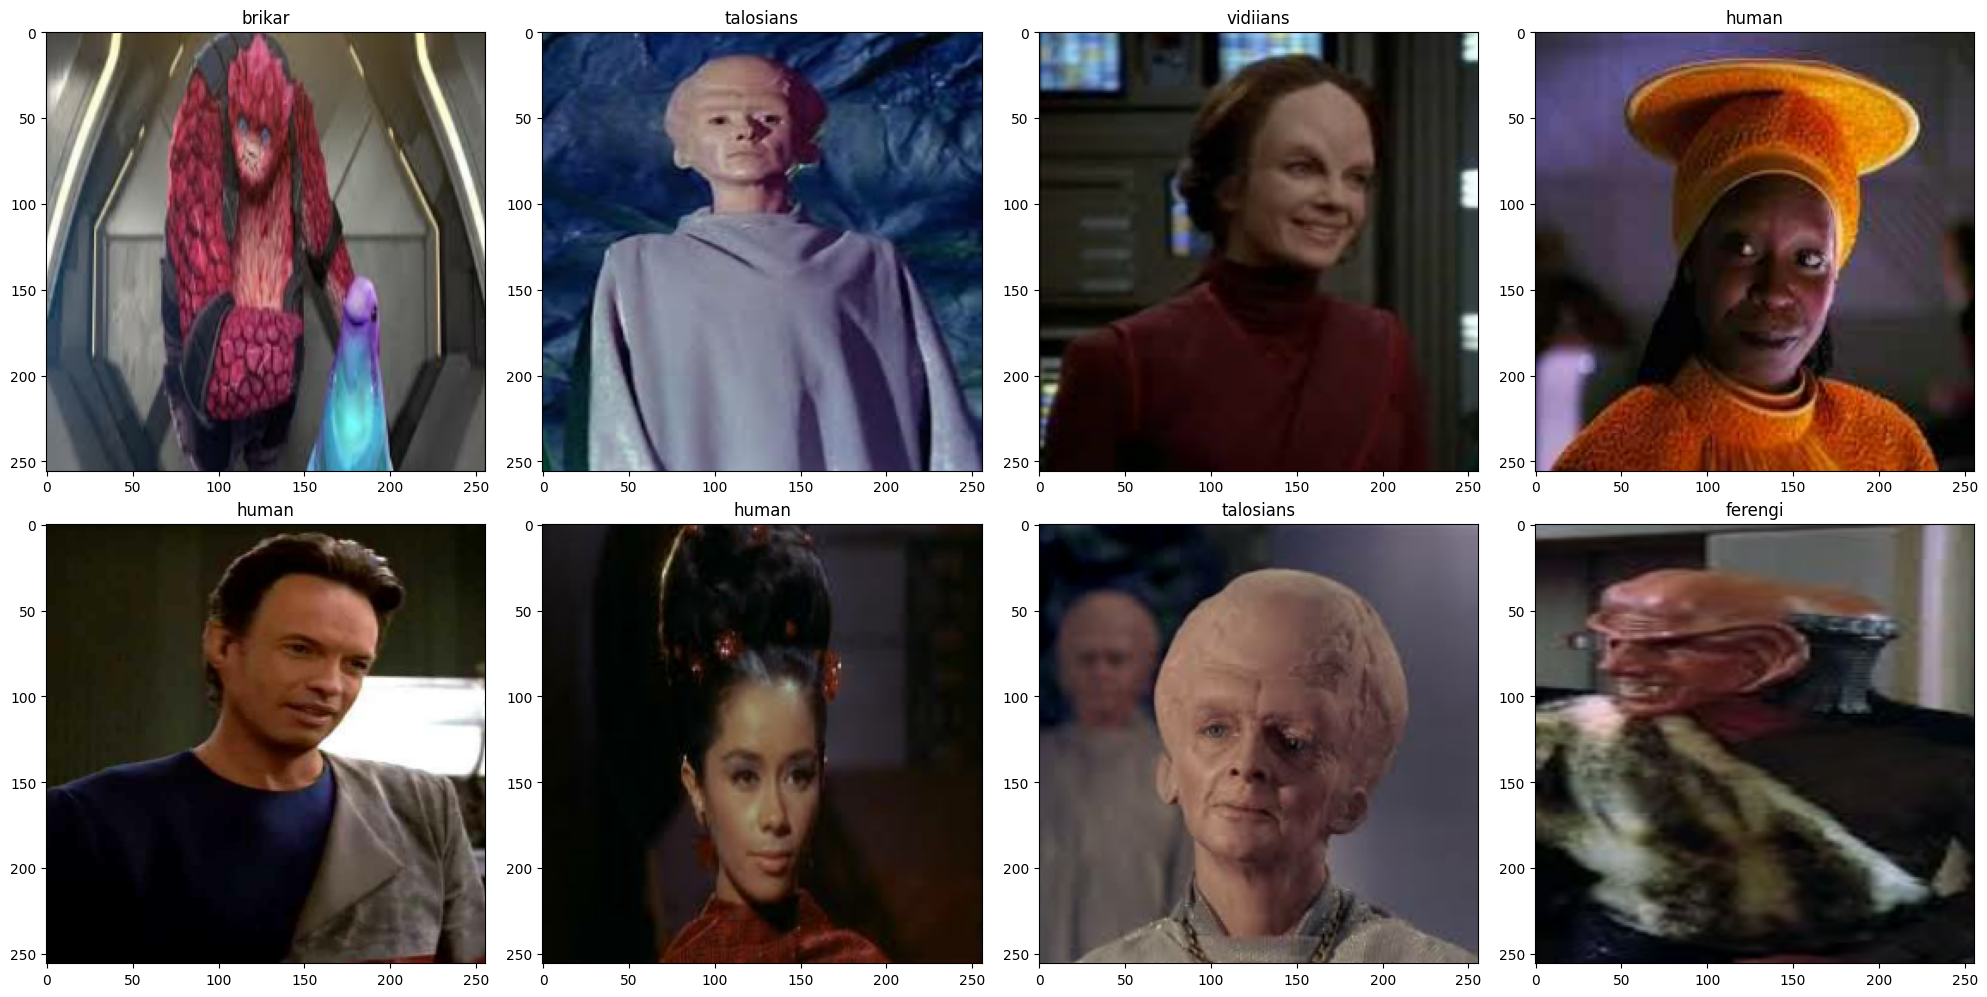

In [11]:
iterator = podaci.as_numpy_iterator()
batch = iterator.next()
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))  # 2 reda, 4 kolone, prilagođena veličina figure

for idx, img in enumerate(batch[0][:8]):  # Prikazujemo prvih 8 slika
    row, col = divmod(idx, 4)  # Računanje reda i kolone
    ax[row, col].imshow(img.astype(int))  # Prikaz slike na odgovarajućoj poziciji
    ime_klase = imena_klasa[batch[1][idx]]  # Dohvatanje imena klase
    ax[row, col].title.set_text(ime_klase)  # Postavljanje naslova

# Ukloni prazne osi ako imaš manje od 8 slika:
for idx in range(len(batch[0][:8]), 8):
    row, col = divmod(idx, 4)
    fig.delaxes(ax[row, col])  # Uklanjanje neiskorišćenih podgrafikona

plt.tight_layout()  # Automatski prilagođavanje rasporeda
plt.show()


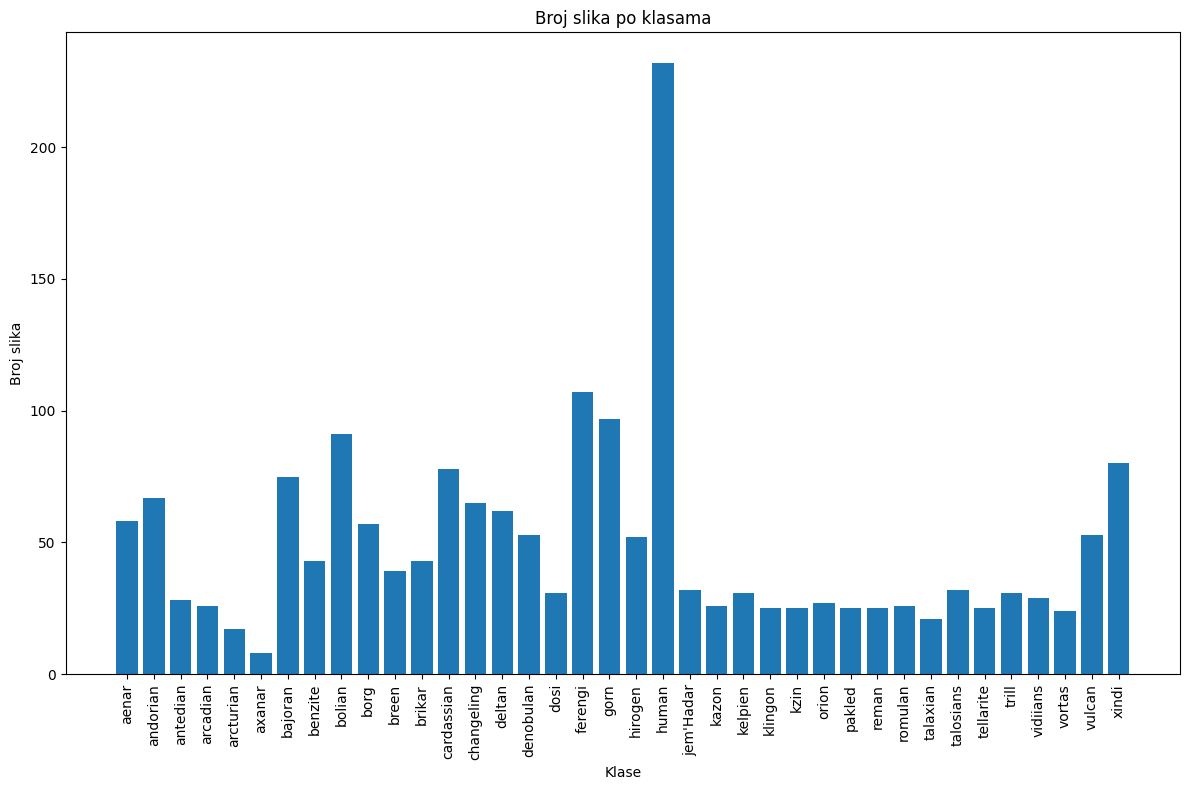

In [12]:
labele = []
for _, labela in podaci:
    labele.extend(labela.numpy())

broj_slika = Counter(labele)

# Pripremi podatke za bar chart
broj_klasa = [broj_slika.get(i, 0) for i in range(len(imena_klasa))]

# Kreiraj bar chart
plt.figure(figsize=(12, 8))
plt.bar(imena_klasa, broj_klasa)
plt.xticks(rotation=90)
plt.title('Broj slika po klasama')
plt.xlabel('Klase')
plt.ylabel('Broj slika')
plt.tight_layout()
plt.show()


In [13]:
import os
import shutil


izvorni_dir = "./ip2-projekat/materijali"
ciljni_dir = "skup_podataka"

# Kreiranje trening i test direktorijuma
trening_dir = os.path.join(ciljni_dir, "trening")
test_dir = os.path.join(ciljni_dir, "test")
os.makedirs(trening_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

klase = os.listdir(izvorni_dir)

for ime_klase in klase:
    putanja = os.path.join(izvorni_dir, ime_klase)

    if not os.path.isdir(putanja):
        continue

    slike = os.listdir(putanja)
    slike = [os.path.join(putanja, img) for img in slike if img.endswith(('.jpg', '.png', '.jpeg'))]  # Filtrirajte slike

    trening_slike, test_slike = train_test_split(slike, test_size=0.3, random_state=42)

    # Kreiranje direktorijuma za trenutnu klasu u train/test
    trening_klase_dir = os.path.join(trening_dir, ime_klase)
    test_klase_dir = os.path.join(test_dir, ime_klase)
    os.makedirs(trening_klase_dir, exist_ok=True)
    os.makedirs(test_klase_dir, exist_ok=True)

    # Premestanje slika u odgovarajuće direktorijume
    for putanja_slike in trening_slike:
        shutil.copy(putanja_slike, os.path.join(trening_klase_dir, os.path.basename(putanja_slike)))
    for putanja_slike in test_slike:
        shutil.copy(putanja_slike, os.path.join(test_klase_dir, os.path.basename(putanja_slike)))

    print(f"Klasa '{ime_klase}' podeljena: {len(trening_slike)} za trening, {len(test_slike)} za test.")

print("Podela završena! Trening i test podaci su organizovani u direktorijumu:", ciljni_dir)

Klasa 'talaxian' podeljena: 14 za trening, 7 za test.
Klasa 'jem'Hadar' podeljena: 22 za trening, 10 za test.
Klasa 'xindi' podeljena: 56 za trening, 24 za test.
Klasa 'deltan' podeljena: 43 za trening, 19 za test.
Klasa 'pakled' podeljena: 17 za trening, 8 za test.
Klasa 'vortas' podeljena: 16 za trening, 8 za test.
Klasa 'antedian' podeljena: 19 za trening, 9 za test.
Klasa 'dosi' podeljena: 21 za trening, 10 za test.
Klasa 'reman' podeljena: 17 za trening, 8 za test.
Klasa 'talosians' podeljena: 22 za trening, 10 za test.
Klasa 'arcturian' podeljena: 11 za trening, 6 za test.
Klasa 'vidiians' podeljena: 20 za trening, 9 za test.
Klasa 'klingon' podeljena: 17 za trening, 8 za test.
Klasa 'arcadian' podeljena: 18 za trening, 8 za test.
Klasa 'axanar' podeljena: 5 za trening, 3 za test.
Klasa 'ferengi' podeljena: 74 za trening, 33 za test.
Klasa 'kazon' podeljena: 18 za trening, 8 za test.
Klasa 'borg' podeljena: 39 za trening, 18 za test.
Klasa 'human' podeljena: 161 za trening, 70 za

In [19]:
input_shape=(224, 224, 3)
num_classes = 38

In [23]:
# Postavke
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam  # Ovo je nedostajalo!

from sklearn.utils.class_weight import compute_class_weight


trening_dir = "./skup_podataka/trening"  # Folder trening skupa
batch_size = 32
img_height, img_width = 224, 224

# Priprema generatora za trening
datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Normalizacija slika
train_generator = datagen.flow_from_directory(
    trening_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True  # Mešanje slika
)

# Imena klasa i njihovi indeksi
imena_klasa = list(train_generator.class_indices.keys())
print("Klase:", imena_klasa)

# Prebrojavanje uzoraka po klasama
broj_uzoraka_po_klasi = train_generator.classes  # Lista klasa za svaku sliku
print("Broj uzoraka po klasama:", np.bincount(broj_uzoraka_po_klasi))

# Izračunavanje težina klasa
tezine_klasa = compute_class_weight(
    class_weight='balanced',  # Balansiranje na osnovu broja uzoraka
    classes=np.unique(broj_uzoraka_po_klasi),
    y=broj_uzoraka_po_klasi
)
tezine_klasa = dict(enumerate(tezine_klasa))  # Konverzija u format koji fit() razume
print("Težine klasa:", tezine_klasa)


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dodavanje dropout sloja za regularizaciju
    tf.keras.layers.Dropout(0.5),  # Dodavanje dropout sloja za regularizaciju
    tf.keras.layers.Dense(len(imena_klasa), activation='softmax')  # Koristite softmax za višeklasnu klasifikaciju
])
# Kompilacija modela
model.compile(
    optimizer='adam',                                                       # Optimizator
    loss='categorical_crossentropy',   # Funkcija gubitka
    metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dropout, BatchNormalization
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

callbacks = [early_stopping, reduce_lr]

history = model.fit(
    train_generator,
    epochs=50,
    class_weight=tezine_klasa,
    callbacks=callbacks
)


Found 1286 images belonging to 38 classes.
Klase: ['aenar', 'andorian', 'antedian', 'arcadian', 'arcturian', 'axanar', 'bajoran', 'benzite', 'bolian', 'borg', 'breen', 'brikar', 'cardassian', 'changeling', 'deltan', 'denobulan', 'dosi', 'ferengi', 'gorn', 'hirogen', 'human', "jem'Hadar", 'kazon', 'kelpien', 'klingon', 'kzin', 'orion', 'pakled', 'reman', 'romulan', 'talaxian', 'talosians', 'tellarite', 'trill', 'vidiians', 'vortas', 'vulcan', 'xindi']
Broj uzoraka po klasama: [ 40  46  19  18  11   5  52  30  63  39  27  30  54  45  43  37  21  74
  67  36 161  22  18  21  17  17  18  17  17  18  14  22  17  21  20  16
  37  56]
Težine klasa: {0: 0.8460526315789474, 1: 0.7356979405034325, 2: 1.7811634349030472, 3: 1.8801169590643274, 4: 3.076555023923445, 5: 6.768421052631579, 6: 0.6508097165991903, 7: 1.1280701754385964, 8: 0.5371762740183793, 9: 0.8677462887989204, 10: 1.253411306042885, 11: 1.1280701754385964, 12: 0.6267056530214425, 13: 0.752046783625731, 14: 0.7870257037943696, 15:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.0420 - loss: 4.0793 - learning_rate: 0.0010
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.0328 - loss: 3.5145 - learning_rate: 0.0010
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.0423 - loss: 3.5934 - learning_rate: 0.0010
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.0409 - loss: 3.5834 - learning_rate: 0.0010
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.1094 - loss: 3.5019 - learning_rate: 0.0010
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.1436 - loss: 3.3091 - learning_rate: 0.0010
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.2649 - loss: 2.6600 - learning_rate: 0.0010
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.3603 - loss: 2.3166 - learning_rate: 0.0010
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.4440 - loss: 1.7948 - learning_rate: 0.0010
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5316 - loss: 1.4607 - learning_rate: 0.0010
Epoch 11/50
41/41 ━━━━━━━━━━━

In [24]:
test_dir = "./skup_podataka/test"  # Putanja do test skupa

# Priprema generatora za test
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Samo normalizacija

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Ne mešamo test podatke
)


Found 579 images belonging to 38 classes.


In [26]:
# Evaluacija modela
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test gubitak: {test_loss:.4f}")
print(f"Test tačnost: {test_accuracy:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.5328 - loss: 2.5889
Test gubitak: 3.1999
Test tačnost: 0.4439


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predikcija
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Prikaz rezultata
print(confusion_matrix(test_generator.classes, y_pred_classes))
print(classification_report(test_generator.classes, y_pred_classes, target_names=imena_klasa))


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step
[[10  2  0 ...  0  0  0]
 [ 2 15  0 ...  0  1  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 1  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 1  0  0 ...  0  0  5]]
              precision    recall  f1-score   support

       aenar       0.32      0.56      0.41        18
    andorian       0.58      0.71      0.64        21
    antedian       1.00      1.00      1.00         9
    arcadian       0.75      0.38      0.50         8
   arcturian       1.00      0.83      0.91         6
      axanar       0.00      0.00      0.00         3
     bajoran       0.54      0.57      0.55        23
     benzite       0.78      0.54      0.64        13
      bolian       0.68      0.93      0.79        28
        borg       0.57      0.22      0.32        18
       breen       0.78      0.58      0.67        12
      brikar       0.30      0.23      0.26        13
  cardassian       0.60      0.25      0.35        24
  changeling       0.55      0.55      0.55   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Zamrzni slojeve

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(imena_klasa), activation='softmax')
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [29]:
model.compile(
    optimizer='adam',  # Možeš zameniti sa SGD ili RMSprop, zavisno od problema
    loss='categorical_crossentropy',  # Koristi ovu funkciju jer imaš više klasa
    metrics=['accuracy']
)


In [31]:
history = model.fit(
    train_generator,
    epochs=10,  # Broj epoha
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=5,
            verbose=1
        ),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ]
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - accuracy: 0.1181 - loss: 3.6554 - learning_rate: 0.0010
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.2500 - loss: 2.5293 - learning_rate: 0.0010
Epoch 3/10


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate
  current = self.get_monitor_value(logs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.4234 - loss: 2.2556 - learning_rate: 0.0010
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.6250 - loss: 1.6885 - learning_rate: 0.0010
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5787 - loss: 1.5498 - learning_rate: 0.0010
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.4375 - loss: 1.6577 - learning_rate: 0.0010
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.6620 - loss: 1.2386 - learning_rate: 0.0010
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.6250 - loss: 1.2925 - learning_rate: 0.0010
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7442 - loss: 0.8747 - learning_rate: 0.0010
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.8750 - loss: 0.6269 - learning_rate: 0.0010


In [32]:
# Evaluacija modela
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test gubitak: {test_loss:.4f}")
print(f"Test tačnost: {test_accuracy:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.8166 - loss: 0.7875
Test gubitak: 0.9052
Test tačnost: 0.7720


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


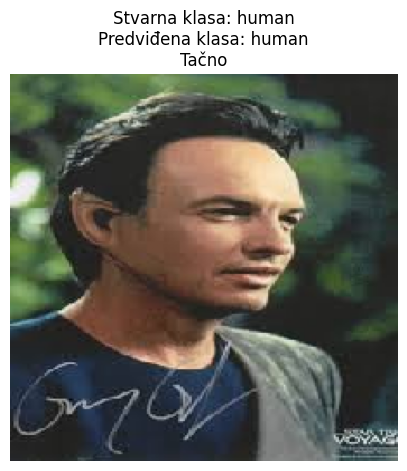

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


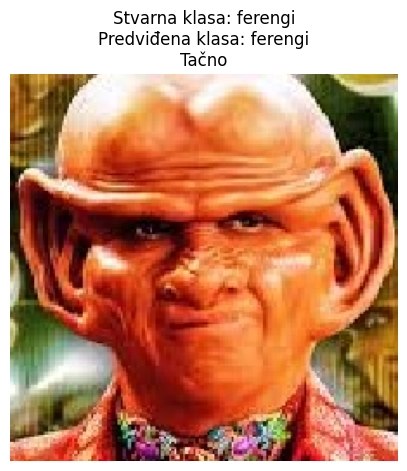

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


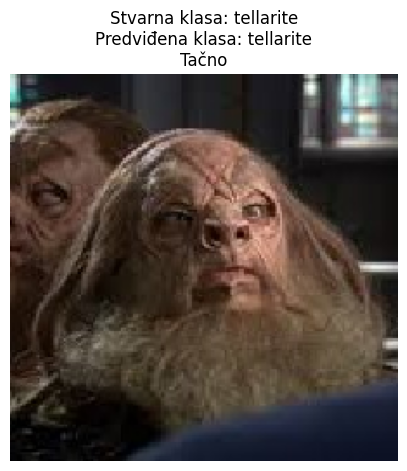

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


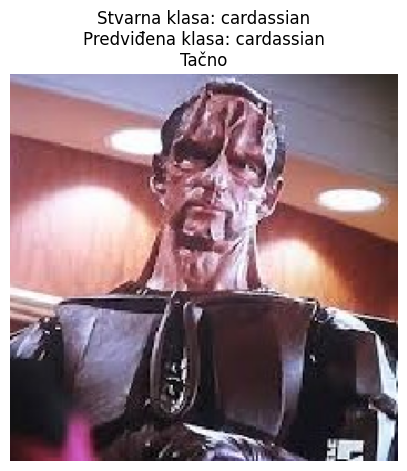

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


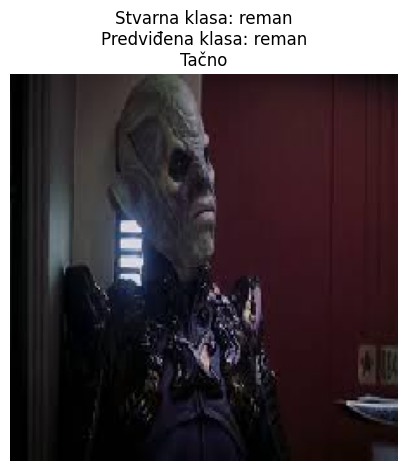

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


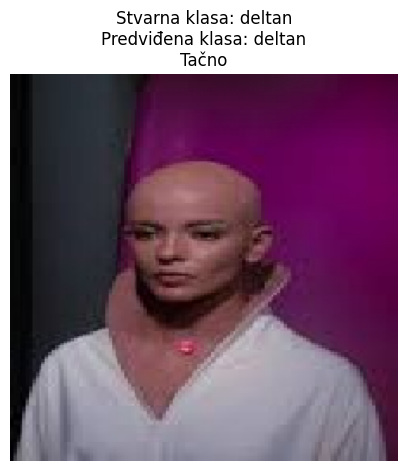

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


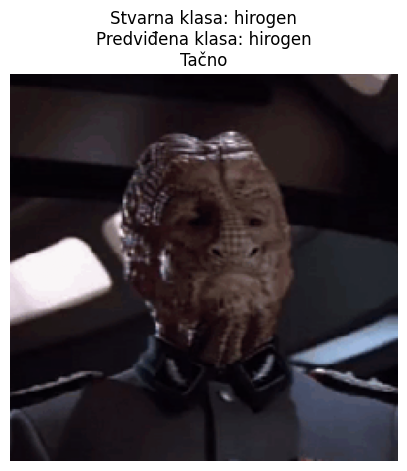

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


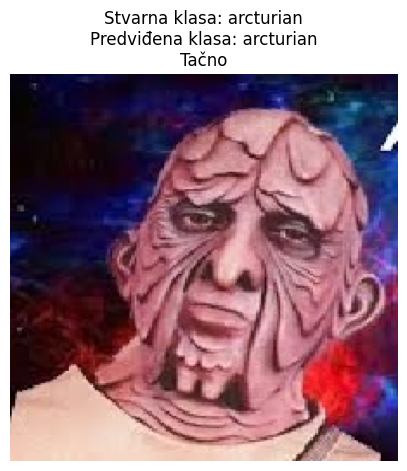

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


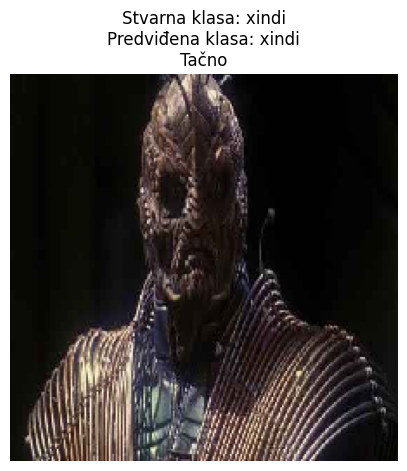

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


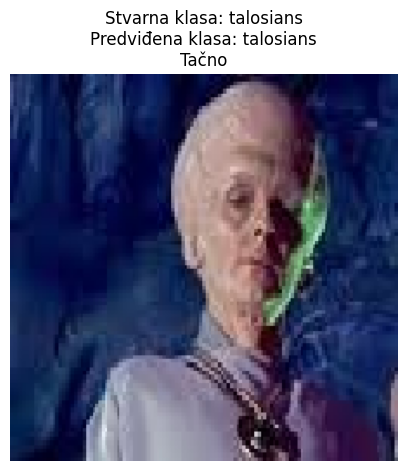

Procenat tačnosti: 100.00%


In [33]:

sortirani_nazivi_klasa = sorted(os.listdir(test_dir))

# Učitavanje test slika
test_slike = []
test_oznake = []

# Prolazak kroz test direktorijum i učitavanje slika
for idx, ime_klase in enumerate(sortirani_nazivi_klasa):
    putanja_klase = os.path.join(test_dir, ime_klase)
    for fajl in os.listdir(putanja_klase):
        putanja_slike = os.path.join(putanja_klase, fajl)
        slika = load_img(putanja_slike, target_size=(224, 224))  # Prilagođavanje veličine slike
        niz_slika = img_to_array(slika) / 255.0          # Normalizacija [0, 1]
        test_slike.append(niz_slika)
        test_oznake.append(idx)

# Konvertovanje u numpy nizove
test_slike = np.array(test_slike)
test_oznake = np.array(test_oznake)

# Nasumični izbor 10 slika za testiranje
indeksi = np.random.choice(range(len(test_slike)), 10, replace=False)

# Inicijalizacija evidencije za tačnost
tacne_predikcije = 0
ukupno_predikcija = 0

# Testiranje modela
for i in indeksi:
    img = test_slike[i]
    prava_oznaka = imena_klasa[test_oznake[i]]

    # Proširivanje dimenzije slike za predikciju
    img_niz = np.expand_dims(img, axis=0)
    predikcija = model.predict(img_niz)
    indeks_predvidjene_klase = np.argmax(predikcija)
    predvidjena_klasa = imena_klasa[indeks_predvidjene_klase]

    # Provera da li je predviđena klasa tačna
    tacno = prava_oznaka == predvidjena_klasa
    if tacno:
        tacne_predikcije += 1
    ukupno_predikcija += 1

    # Prikaz slike sa stvarnom i predviđenom klasom
    plt.figure(figsize=(5, 6))
    plt.imshow(img)
    plt.title(f"Stvarna klasa: {prava_oznaka}\nPredviđena klasa: {predvidjena_klasa}\n{'Tačno' if tacno else 'Pogrešno'}")
    plt.axis('off')
    plt.show()

# Izračunavanje tačnosti modela
preciznost_predikcije = (tacne_predikcije / ukupno_predikcija) * 100
print(f"Procenat tačnosti: {preciznost_predikcije:.2f}%")

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l2

def my_custom_mobilenet(input_shape, num_classes):
    model = Sequential()

    # Blok 1: Standardna konvolucija (kao početak MobileNet-a)
    model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())

    # Blok 2: Depthwise Separable Convolution
    model.add(DepthwiseConv2D((3, 3), padding='same', strides=(1, 1), activation=None))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(64, (1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())

    # Blok 3: Još jedan Depthwise Separable Convolution
    model.add(DepthwiseConv2D((3, 3), padding='same', strides=(2, 2), activation=None))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(128, (1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())

    # Blok 4: Depthwise Separable Convolution
    model.add(DepthwiseConv2D((3, 3), padding='same', strides=(2, 2), activation=None))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(256, (1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())

    # Global Average Pooling
    model.add(GlobalAveragePooling2D())

    # Fully Connected slojevi
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Kreiranje modela
input_shape = (224, 224, 3)  # Veličina ulaznih slika
num_classes = len(imena_klasa)  # Broj klasa
custom_model = my_custom_mobilenet(input_shape, num_classes)

# Kompilacija modela
custom_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Ispis strukture modela
custom_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 112, 112, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d (DepthwiseConv2D)   │ (None, 112, 112, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 112, 112, 64)        │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_1 (DepthwiseConv2D) │ (None, 56, 56, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 56, 56, 128)         │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_2 (DepthwiseConv2D) │ (None, 28, 28, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 256)         │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 256)                 │              

 Total params: 124,966 (488.15 KB)

 Trainable params: 123,558 (482.65 KB)

 Non-trainable params: 1,408 (5.50 KB)

In [35]:
history = custom_model.fit(
    train_generator,
    epochs=10,  # Broj epoha
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=5,
            verbose=1
        ),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ]
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 244ms/step - accuracy: 0.0985 - loss: 5.8133 - learning_rate: 0.0010
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.1875 - loss: 4.7859 - learning_rate: 0.0010
Epoch 3/10


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate
  current = self.get_monitor_value(logs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.2235 - loss: 4.4468 - learning_rate: 0.0010
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - accuracy: 0.3438 - loss: 3.8441 - learning_rate: 0.0010
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.2488 - loss: 3.7344 - learning_rate: 0.0010
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.1562 - loss: 3.7718 - learning_rate: 0.0010
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.2813 - loss: 3.3267 - learning_rate: 0.0010
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.2500 - loss: 3.3011 - learning_rate: 0.0010
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.3036 - loss: 2.9962 - learning_rate: 0.0010
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - accuracy: 0.2500 - loss: 2.9728 - learning_rate: 0.0010
